In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact 

In [3]:
import interface_utils as util

In [4]:
import os
os.environ['PATH'] += ':/data/pacbio_assembly/AwesomeAssembler/DALIGNER'
#print os.popen("export").read()

In [11]:
path = '/data/pacbio_assembly/AwesomeAssembler/data/'
aln = []
for item in util.get_alignments2(path+'ecoli',path+'ecoli.las',[2]):
    aln.append(item)

In [6]:
aln[0:5]

[['n', 0, 104, 170, 7424, 7424, 4749, 11779, 13726, 1294, 7],
 ['c', 0, 757, 206, 7424, 7424, 3568, 10592, 15876, 1242, 7],
 ['n', 0, 978, 214, 1850, 7424, 9996, 11675, 11675, 392, 1],
 ['n', 0, 1183, 1183, 3057, 7424, 156, 2065, 5115, 359, 2],
 ['n', 0, 1183, 3057, 6052, 7424, 2151, 5115, 5115, 517, 3]]

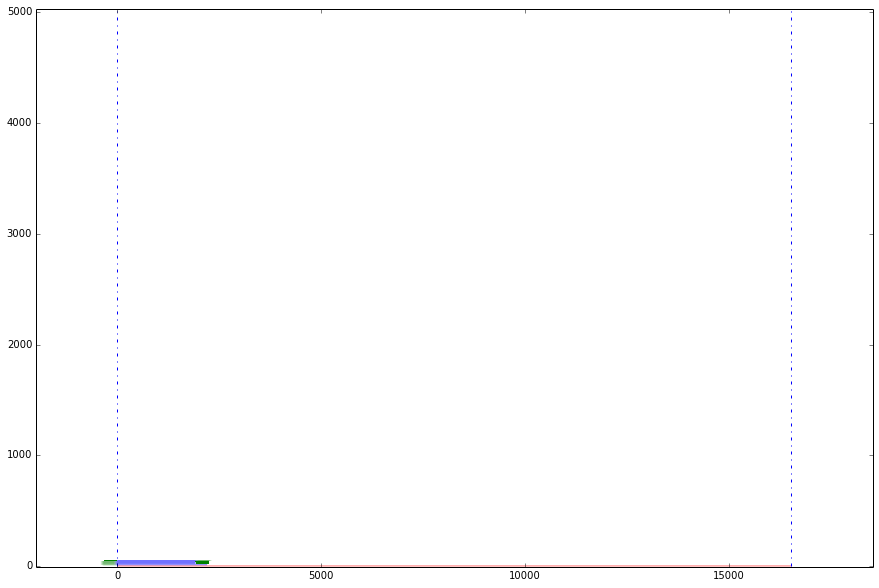

In [15]:
aln.sort(key = lambda x:x[3])
num = len(aln)
#size_chunk = num/10
#for i in range(10):
#    aln[i*size_chunk:min((i+1)*size_chunk, num)] = sorted(aln[i*size_chunk:min((i+1)*size_chunk, num)],key = lambda x: x[4]-x[3] ,reverse=True)

plt.figure(figsize = (15,10))
plt.axes()
l = aln[0][5]
plt.xlim(-2000,l+2000)
plt.ylim(-5,num*10)
points = [[0,0], [l,0], [l+40,2.5], [l,5], [0,5]]
#rectangle = plt.Rectangle((0, 0), l, 5, fc='r',ec = 'none')
polygon = plt.Polygon(points,fc = 'r', ec = 'none')
plt.gca().add_patch(polygon)

dotted_line = plt.Line2D((0, 0), (0, num*10 ),ls='-.')               
plt.gca().add_line(dotted_line)

dotted_line2 = plt.Line2D((l, l), (0, num*10 ),ls='-.')               
plt.gca().add_line(dotted_line2)

for i,item in enumerate(aln):
    abpos = item[3]
    aepos = item[4]
    bbpos = item[6]
    bepos = item[7]
    blen = item[8]
    strand = item[0]
    points_begin = []
    points_end = []
    tip = l/200
    ed = l/50
    
    if strand == 'n':
        points = [[abpos, (i+1)*10], [aepos, (i+1)*10], [aepos + tip, (i+1)*10 + 2.5], [aepos, (i+1)*10+5], [abpos, (i+1)*10+5]]
        if (bepos < blen):
            points_end = [[aepos, (i+1)*10], [aepos + tip, (i+1)*10 + 2.5], [aepos, (i+1)*10+5], [aepos+ed, (i+1)*10+5], [aepos + ed+ tip, (i+1)*10 + 2.5],  [aepos+ed, (i+1)*10]]
        if (bbpos > 0):
            points_start = [[abpos, (i+1)*10], [abpos, (i+1)*10+5], [abpos-ed, (i+1)*10+5], [abpos-ed, (i+1)*10]]
    else:
        points = [[abpos, (i+1)*10], [aepos, (i+1)*10], [aepos, (i+1)*10+5], [abpos, (i+1)*10+5], [abpos - tip, (i+1)*10 + 2.5]]
        if (bepos < blen):
            points_end = [[aepos, (i+1)*10],  [aepos, (i+1)*10+5], [aepos+ed, (i+1)*10+5], [aepos+ed, (i+1)*10]]
        if (bbpos > 0):
            points_start = [[abpos, (i+1)*10],[abpos-tip, (i+1)*10+2.5], [abpos, (i+1)*10+5], [abpos-ed, (i+1)*10+5],[abpos-ed-tip, (i+1)*10+2.5], [abpos-ed, (i+1)*10]]
    
    polygon = plt.Polygon(points,fc = 'b', ec = 'none')
    plt.gca().add_patch(polygon)
    
    if points_end != []:
        polygon2 = plt.Polygon(points_end,fc = 'g', ec = 'none')
        plt.gca().add_patch(polygon2)
    

    if points_start != []:
        polygon2 = plt.Polygon(points_start,fc = 'g', ec = 'none')
        plt.gca().add_patch(polygon2)
    
    plt.savefig('test.pdf')

In [12]:
len(aln)

233